<a href="https://colab.research.google.com/github/qurrata111/eksplorasi/blob/master/basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 27/01/2020
# https://www.tensorflow.org/tutorials/keras/classification

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [3]:
# download mnist datasets
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

60000
60000
10000
10000


In [23]:
print(train_images[0][0])
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
9


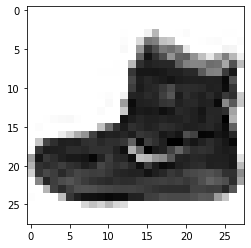

In [11]:
plt.imshow(train_images[0], cmap=plt.cm.binary)

In [0]:
# merepresentasikan nilai label, nilai label merepresentasikan nilai gambar
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

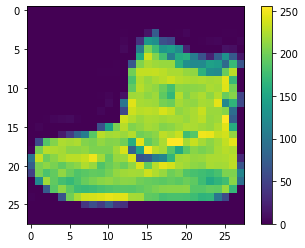

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

cd app

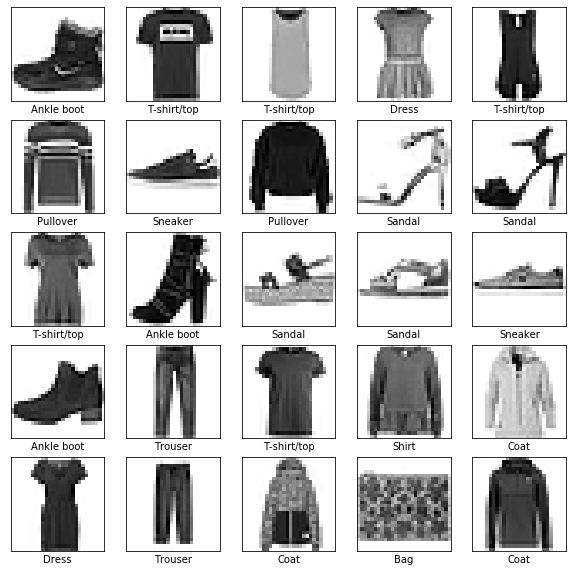

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
# BUILD MODEL
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# FEED MODEL
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4913 - acc: 0.8283
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3714 - acc: 0.8665
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3352 - acc: 0.8787
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3113 - acc: 0.8860
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2954 - acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2800 - acc: 0.8956
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2669 - acc: 0.9013
Epoch 8/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2578 - acc: 0.9034
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2456 - acc: 0.9077
Epoch 10/10
60000/60000 [==============================] - 

In [22]:
# EVALUASI MODEL
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3615 - acc: 0.8765

Test accuracy: 0.8765


In [0]:
# membuat prediksi
predictions = model.predict(test_images)

In [26]:
# contoh prediksi
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

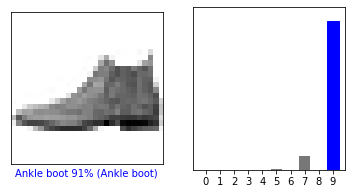

In [30]:
# contoh hasil prediksi
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

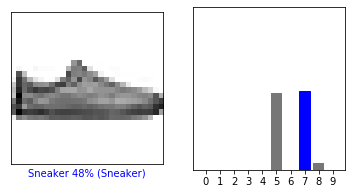

In [31]:
# contoh hasil prediksi
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

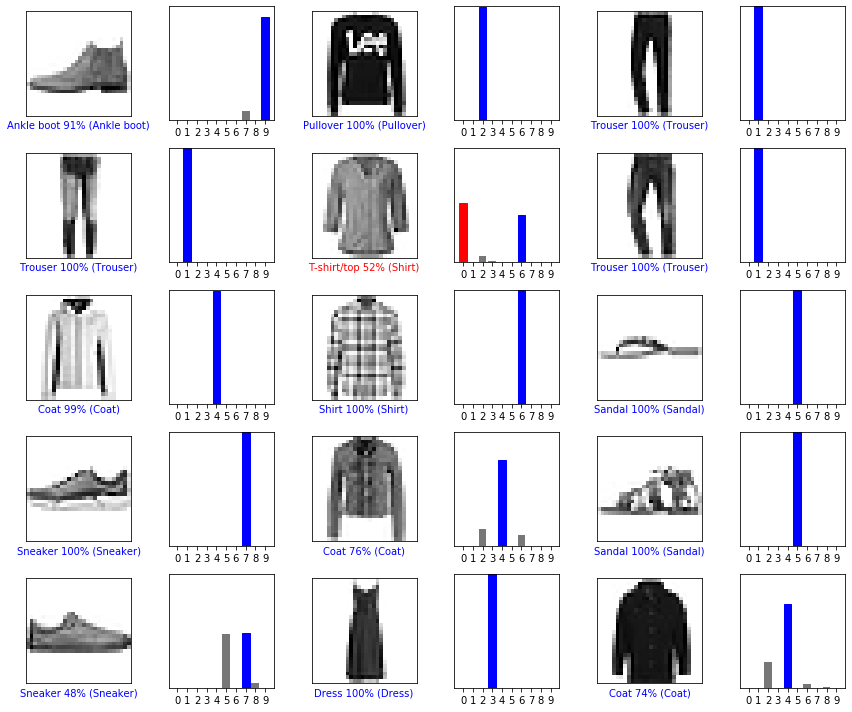

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
# use train model
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.1798802e-04 6.7923445e-13 9.9698800e-01 9.1754400e-06 2.6704327e-04
  7.2514721e-14 2.5178476e-03 2.4402800e-13 2.7553821e-08 2.0770299e-11]]


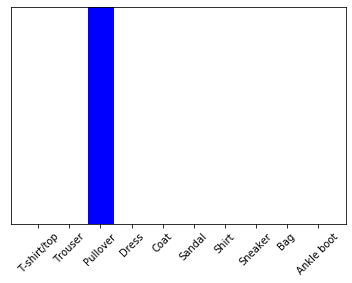

In [36]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

2